<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230105_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%2C%EC%A3%BC%EC%84%B1%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#230105
#상관관계 분석

In [44]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

In [45]:
#한글설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [46]:
plt.rc('font', family='NanumBarunGothic')

In [47]:
#정규화
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import boxcox

In [48]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#ANOVA
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [50]:
df2 = pd.read_csv("/content/drive/MyDrive/230103_Ashopping2.csv", encoding="cp949")
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [51]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [52]:
df1 = df2[["총_매출액", "1회_평균매출액", "총_할인_금액", "방문빈도", "구매_카테고리_수"]]

df1.corr(method="pearson")  #stats -> corr함수

#결과값
#'총매출액'과 가장 상관관계 높은것: '방문빈도'(0.631)- 제거기준 0.7보다는 낮지만 연관관계는 있을 수 있다. 

,총_매출액,1회_평균매출액,총_할인_금액,방문빈도,구매_카테고리_수
총_매출액,1.000000,0.314133,-0.004880,0.631171,0.308347
1회_평균매출액,0.314133,1.000000,-0.018000,-0.279690,-0.151587
총_할인_금액,-0.004880,-0.018000,1.000000,0.044814,0.022649
방문빈도,0.631171,-0.279690,0.044814,1.000000,0.395861
구매_카테고리_수,0.308347,-0.151587,0.022649,0.395861,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


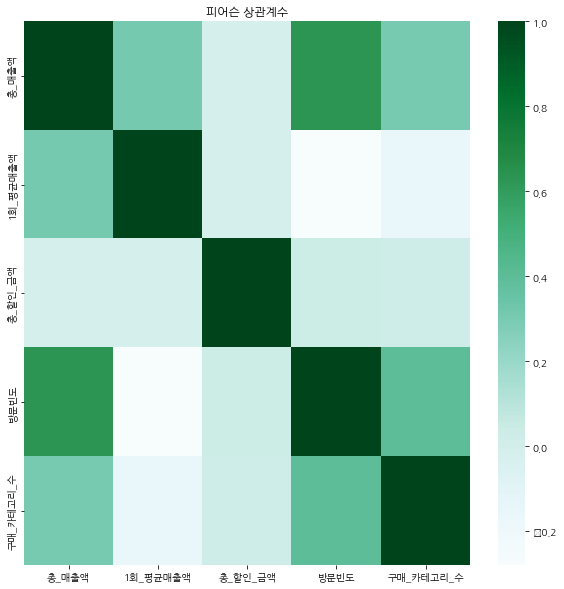

In [53]:
matplotlib.rcParams["font.family"] = "NaNumGothic"
colormap = plt.cm.BuGn #'BuGn' -> BlueGreen
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수")
sns.heatmap(df1.astype(float).corr(), cmap=colormap) #'cmap=colormap' -> 표 색상변경(히트맵)

#주성분 분석

In [ ]:
from sklearn.decomposition import PCA
df = df2

In [ ]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [ ]:
#결측값 확인
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [ ]:
#결측값 제거
df = df.dropna(axis = 0) #'axis = 0' -> '행 방향'으로 없앤다
                         # dropna() 제대로 작동되지 않을 때, 옵션 inplace = True 추가
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [ ]:
features = ['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
          '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
          '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
          'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
          '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
          '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성']
#y= '총_매출액', x= features에 나타나는 변수들

In [34]:
x = df.drop(["총_매출액"], axis = 1).values  #'총_매출액' 열을 뺀 df자료(y에 '총_매출액'을 넣을것이기 때문)
y = df["총_매출액"].values  #.values(): 값만 뽑은것이기 때문에 엑셀형태 아님. 따로 엑셀형태로 변환시켜주어야함
x = StandardScaler().fit_transform(x)  #StandardScaler().fit_transform(): 원래는 -1~1의 범위로 나타나지만, 편차가 너무 크면 -1~1 범위보다 넘어가기도 함. 
                                       #x의 '열 별로' 각각 정규화가 진행됨. 
x = pd.DataFrame(x, columns = features)  #.Dataframe()을 통해 데이터를 엑셀형태(표형태)로 변환
                                         #'columns = features' -> x 데이터프레임의 열에 features이름을 넣음
x

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,-1.732022,-0.267091,-0.441573,-0.349867,-1.802715,-2.584469,-0.606201,0.906277,-0.907907,0.728382,...,0.304803,1.359596,0.388037,0.248061,0.369038,0.709074,0.575894,0.365703,0.635247,0.673617
1,-1.721671,-0.267091,-0.441573,0.137952,-1.802715,-2.586715,-0.606201,0.906277,1.101434,-0.110754,...,0.304803,0.189258,-0.977399,0.248061,0.369038,0.709074,0.575894,0.365703,-0.621795,0.673617
2,-1.718221,-0.267091,2.241133,-0.552582,-0.847100,-0.420127,-0.606201,-1.107406,-0.907907,0.728382,...,-0.921700,0.189258,0.388037,0.248061,-0.872407,-0.373197,0.575894,0.365703,-0.621795,0.673617
3,-1.714771,-0.267091,-0.010424,-0.811139,0.466871,0.494421,-0.606201,0.906277,-0.907907,-0.110754,...,0.304803,0.189258,0.388037,0.248061,-0.872407,-0.373197,-0.433120,0.365703,0.635247,-0.675221
4,-1.711321,-0.267091,-0.968534,0.330748,1.661390,0.789103,-0.606201,-2.114247,-0.907907,0.728382,...,-2.148203,-0.981080,0.388037,-2.311684,0.369038,-0.373197,-1.442135,-0.864521,-0.621795,-2.024058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697454,-0.267091,-0.297857,1.291217,0.825227,0.784162,-0.606201,-0.100564,-0.907907,1.567518,...,1.531305,1.359596,0.388037,-1.031812,0.369038,1.791344,0.575894,0.365703,0.635247,0.673617
837,1.700905,-0.267091,-0.872723,1.386849,-1.563812,-2.234084,-0.606201,-0.100564,1.101434,0.728382,...,0.304803,0.189258,1.753473,0.248061,1.610483,0.709074,0.575894,0.365703,0.635247,0.673617
838,1.704355,-0.267091,1.091402,-0.457561,-1.205456,-0.957428,-0.606201,-1.107406,-0.907907,0.728382,...,0.304803,1.359596,0.388037,-1.031812,0.369038,-0.373197,1.584908,0.365703,0.635247,0.673617
839,1.711255,-0.267091,-0.537384,1.854534,0.466871,0.490423,-0.606201,-0.100564,-0.907907,-0.110754,...,-0.921700,-2.151418,-2.342835,-2.311684,-2.113852,-1.455467,-0.433120,-0.864521,-1.878838,-2.024058


In [38]:
pca = PCA(random_state=105) #PCA(): 주성분 분석; Principal Component Analysis
                            #105 = 임의의 숫자로 설정; 처음을 105로 시작한다. 

In [39]:
#주성분(뭉태기)갯수 추정
import numpy as np
x_pca = pca.fit_transform(x)  
pd.Series(np.cumsum(pca.explained_variance_ratio_))

#38개의 x중 37만 나왔다? (x의 columns갯수 = 38)
#'cumsum': 누적합 
#'.explained_variance_ratio_: '분산의 성멸률'이 pca가 늘어날수록 점점 높아지고 있음. 80%이상부터 적정한 설명률(주성분이 16개일때 0.8079 도달)
# x 37개에서 주성분 16개로 줄여서 y와의 관계를 분석하는것이 효율적(37개 모두 반영하면 비효율적이기 때문)

0     0.162329
1     0.283895
2     0.353646
3     0.411711
4     0.461924
5     0.505541
6     0.544843
7     0.582341
8     0.616934
9     0.645848
10    0.673056
11    0.698606
12    0.723489
13    0.747585
14    0.768625
15    0.788657
16    0.807985
17    0.825499
18    0.842408
19    0.857553
20    0.872564
21    0.886608
22    0.899589
23    0.911920
24    0.923865
25    0.935792
26    0.946320
27    0.955307
28    0.963788
29    0.971105
30    0.977672
31    0.983139
32    0.988481
33    0.992303
34    0.995849
35    0.998250
36    1.000000
37    1.000000
dtype: float64

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)  #주성분 16개
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16'])
principalDF  

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-3.144284,0.146885,-0.613301,1.133644,3.288263,-0.579239,0.223448,0.058508,0.252953,-0.320831,1.762464,-0.696030,0.383638,0.674212,0.410526,0.355085
1,-0.411063,-0.926161,-0.972739,-1.123971,2.891145,-0.273291,-1.310444,-0.236922,-1.324265,-0.622326,1.629587,0.244889,0.823272,-0.157595,0.091780,-0.087583
2,-0.380796,3.514288,0.459686,-0.078145,0.644068,1.628725,-1.449322,-0.562845,2.011248,-0.801669,1.709281,-0.123841,0.040667,-0.391845,0.812034,-1.154837
3,-2.241322,1.239118,-0.605076,2.686848,-0.343068,0.212606,1.960735,-1.002062,-0.079655,1.659314,2.278389,-0.148526,1.094539,-0.471931,-0.817295,1.324309
4,4.258360,-0.430648,0.022986,-1.879769,-1.479782,-1.188062,1.309387,0.925607,0.980222,-1.577851,0.904199,-1.537096,-0.436422,0.384439,1.249681,1.574331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.987063,1.318441,0.478970,-1.015948,-0.573018,-0.545278,0.477648,2.003137,0.537156,1.145790,-0.186841,0.625913,-1.176018,-0.589955,-2.124807,0.496039
837,-1.649407,-2.179778,-1.138764,-1.470642,2.514597,-0.405549,-0.556114,3.744181,-0.477696,0.010696,-2.139986,-0.313600,-0.460513,3.181474,0.802908,-0.664057
838,-2.388734,1.843291,0.336494,-1.289211,1.390596,1.190026,-0.495045,-0.991321,1.653034,1.240758,-0.845035,0.994607,-1.281106,-0.808574,-0.762489,-0.419346
839,5.868164,1.084378,0.033058,-0.345292,-0.119294,-0.265986,-0.482269,2.225661,0.909602,1.311170,-0.297441,0.554979,-0.856561,-0.463386,-0.475482,1.176424
